# 분류

## 4.6 XGBoost(eXtra Gradient Boost)

#### XGBoost 개요
- XGBoost는 GBM에 기반하고 있지만 GBM의 단점인 느린 수행 시간 및 과적합 규제 부재 등의 문제를 해결한 모델
- XGBoost 장점
    - 뛰어난 예측 성능
    - GBM 대비 빠른 수행 시간(병렬 수행 가능하며 GBM보다는 빠르나 다른 모델보다 빠른 것은 아님)
    - 과적합 규제
    - 나무 가지치기
    - 자체 내장된 교차 검증(반복 수행 시마다 내부적으로 학습 데이터, 평가 데이터 세트에 대한 교차 검증을 수행해 최적화된 횟수 가능)
    - 결손값 자체 처리

#### 파이썬 래퍼 XGBoost 하이퍼 파라미터
- 파이썬 래퍼 XGBoost 모듈과 사이킷런 래퍼 XGBoost 모듈의 일부 하이퍼 파라미터는 약간 다르므로 주의 필요
- 동일한 기능을 의미하는 하이퍼 파라미터이지만, 사이킷런 파라미터의 범용화된 규칙 이름에 따라 파라미터 명이 달라짐
- XGBoost 파라미터 유형
    - 일반 파라미터: 일반적으로 실행 시 스레드 개수, silent 등 선택을 위한 파라미터로서 디폴드 파라미터 값을 바꾸는 경우가 매우 적음
    - 부스트 파라미터: 트리 최적화, 부스팅, regularization 등과 관련 파라미터 등을 지칭(대부분의 파라미터가 속함)
    - 학습 태스트 파라미터: 학습 수행 시의 객체 함수, 평가를 위한 지표 등을 설정하는 파라미터

- 주요 일반 파라미터
    - booster: gbtree(tree based model) 또는 gblinear(linear model) 선택, 디폴트는 gbtree
    - silent: 디폴트는 0이며, 출력 메시지를 나타내고 싶지 않을 경우 1
    - nthread: CPU의 실행 스레드 개수를 조정하며, 디폴트는 모든 CPU의 스레드를 다 사용하는 것
- 주요 부스트 파라미터
    - eta: GBM의 학습률과 같은 바라미터(디폴트는 0.3이고 사이킷런 래퍼 클래스의 경우 디폴트는 0.1 // 보통 0.01 ~ 0.2 사이를 선호)
    - num_boost_rounds: GBM의 n_estimators와 같은 파라미터
    - min_child_weight: 트리에서 추가적으로 가지를 나눌지를 결정하기 위해 필요한 데이터들의 weight 총합(클수록 분할을 자제, 디폴트 1)
    - gamma: 트리의 리프 노드를 추가적으로 나눌지를 결정할 최소 손실 감소 값(클수록 과적합 감소, 디폴트 0)
    - max_depth: 트리 기반 알고리즘의 max_depth와 같으며, 0이면 제한 없음(클수록 과적합이 커짐, 디폴트 6 // 보통 3 ~ 10 사이를 선호)
    - sub_sample: GBM의 subsample과 동일하며, 데이터 샘플링 비율을 설정(디폴트는 1(전체) // 보통 0.5 ~ 1 사이를 선호)
    - colsample_bytree: GBM의 max_features와 유사(디폴트 1)
    - lambda: L2 규제 적용 값으로, 피처 개수가 많을 경우 적용을 검토(클수록 과적합 감소, 디폴트 1)
    - alpha: L1 규제 적용 값으로, 피처 개수가 많을 경우 적용을 검토(클수록 과적합 감소, 디폴트 0)
    - scale_pos_weight: 특정 값으로 치우친 비대칭한 클래스로 구성된 데이터 세트의 균형을 유지하기 위한 파라미터(디폴트 1)
- 학습 태스크 파라미터
    - objective: 최소값을 가져야할 손실 함수를 정의(주로 사용되는 손실함수는 이진 분류인지 다중 분류인지에 따라 달라짐)
        - binary:logistic: 이진 분류일 때 사용
        - multi:softmax: 다중 분류일 때 사용(레이블의 개수인 num_class 파라미터를 지정해야 함)
        - multi:softprob: mult:softmax와 유사하나 개별 레이블 클래스의 해당하는 예측 확률을 반환
        - eval_metric: 검증에 사용되는 함수를 정의(기본값은 회귀인 경우 rmse, 분류는 error) // 다음은 eval_metric의 유형들
            - rmse: Root Mean Square Errror
            - mae: Mean Absolute Errror
            - logloss: Negative log-likelihood
            - error: Binary classification error rate(0.5 threshold)
            - merror: Multiclass classification error rate
            - mlogloss: Multiclass logloss
            - auc: Area under the curve
            
- 과적합 문제가 심각하다면 다음과 같이 적용할 것을 고려할 수 있음
    - eta 값을 낮춤 -> eta를 낮추면 반대로 num_round(또는 n_estimators)는 반대로 높여줘야 함
    - max_depth를 낮춤
    - min_child_weight 값을 높임
    - gamma 값을 높임
    - subsample, colsample_bytree를 조정하는 것도 트리가 너무 복잡하게 생성되는 것을 막아 과적합에 도움이 될 수 있음

- XGBoost는 자체적으로 교차 검증, 성능 평가, 피처 중요도 등의 시각화 기능을 가지고 있음
- 수행 속도의 증가를 위해 조기 종료 기능이 있음 -> 성능 개선이 일정 이상 안되면 종료(LightGBM도 가능)

In [1]:
import xgboost

print(xgboost.__version__)

0.90


#### 파이썬 래퍼 XGBoost 적용 - 위스콘신 유방암 예측

In [2]:
import xgboost as xgb
from xgboost import plot_importance
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer # 유방암 데이터
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore') # 오류 무시

dataset = load_breast_cancer()
X_features= dataset.data
y_label = dataset.target

cancer_df = pd.DataFrame(data=X_features, columns=dataset.feature_names)
cancer_df['target']= y_label
cancer_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [3]:
print(dataset.target_names)
print(cancer_df['target'].value_counts()) # 악성 0, 양성 1

['malignant' 'benign']
1    357
0    212
Name: target, dtype: int64


In [4]:
# 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
X_train, X_test, y_train, y_test=train_test_split(X_features, y_label, test_size=0.2, random_state=156 )
print(X_train.shape , X_test.shape)

(455, 30) (114, 30)


In [5]:
# XGBoost는 학습용, 테스트용 데이터 세트를 위해 별도의 개체인 DMatrix를 생성
# DMatrix는 주로 넘파이를 파라미터(주로 data, lable)를 받아서 만들어지는 XGBoost만의 전용 데이터 세트
dtrain = xgb.DMatrix(data=X_train , label=y_train)
dtest = xgb.DMatrix(data=X_test , label=y_test)

In [6]:
# XGBoost 파라미터 설정(딕셔너리 형태)
params = { 'max_depth':3,
           'eta': 0.1,
           'objective':'binary:logistic',
           'eval_metric':'logloss',
           'early_stoppings':100
        }
num_rounds = 400 
# 'early_stoppings'은 조기 중단을 수행할 수 있는 시점, 반드시 eval_metric, eval_set이 함께 설정되어야 함
# XGBoost는 반복마다 eval_set으로 지정된 데이터 세트에서 eval_metric의 지정된 평가 지표로 예측 오류를 측정

In [7]:
# train 데이터 셋은 'train', evaluation(test) 데이터 셋은 'eval'로 명기합니다. 
wlist = [(dtrain,'train'), (dtest,'eval')] # 조기 중단을 위해 evals 파라미터에 데이터 세트를 명기해줘야 함
# 하이퍼 파라미터와 early stopping 파라미터를 train( ) 함수의 파라미터로 전달
xgb_model = xgb.train(params = params , dtrain=dtrain , num_boost_round=num_rounds , evals=wlist) # train-logloss, eval-logloss 감소

[0]	train-logloss:0.609688	eval-logloss:0.61352
[1]	train-logloss:0.540803	eval-logloss:0.547842
[2]	train-logloss:0.483753	eval-logloss:0.494247
[3]	train-logloss:0.434457	eval-logloss:0.447986
[4]	train-logloss:0.39055	eval-logloss:0.409109
[5]	train-logloss:0.354145	eval-logloss:0.374977
[6]	train-logloss:0.321222	eval-logloss:0.345714
[7]	train-logloss:0.292592	eval-logloss:0.320529
[8]	train-logloss:0.267467	eval-logloss:0.29721
[9]	train-logloss:0.245153	eval-logloss:0.277991
[10]	train-logloss:0.225694	eval-logloss:0.260302
[11]	train-logloss:0.207937	eval-logloss:0.246037
[12]	train-logloss:0.192184	eval-logloss:0.231556
[13]	train-logloss:0.177916	eval-logloss:0.22005
[14]	train-logloss:0.165222	eval-logloss:0.208572
[15]	train-logloss:0.153622	eval-logloss:0.199993
[16]	train-logloss:0.14333	eval-logloss:0.190118
[17]	train-logloss:0.133985	eval-logloss:0.181818
[18]	train-logloss:0.125599	eval-logloss:0.174729
[19]	train-logloss:0.117286	eval-logloss:0.167657
[20]	train-logl

[164]	train-logloss:0.0072	eval-logloss:0.087777
[165]	train-logloss:0.00718	eval-logloss:0.087517
[166]	train-logloss:0.007161	eval-logloss:0.087542
[167]	train-logloss:0.007142	eval-logloss:0.087642
[168]	train-logloss:0.007122	eval-logloss:0.08739
[169]	train-logloss:0.007103	eval-logloss:0.087377
[170]	train-logloss:0.007084	eval-logloss:0.087298
[171]	train-logloss:0.007065	eval-logloss:0.087368
[172]	train-logloss:0.007047	eval-logloss:0.087395
[173]	train-logloss:0.007028	eval-logloss:0.087385
[174]	train-logloss:0.007009	eval-logloss:0.087132
[175]	train-logloss:0.006991	eval-logloss:0.087159
[176]	train-logloss:0.006973	eval-logloss:0.086955
[177]	train-logloss:0.006955	eval-logloss:0.087053
[178]	train-logloss:0.006937	eval-logloss:0.08697
[179]	train-logloss:0.00692	eval-logloss:0.086973
[180]	train-logloss:0.006901	eval-logloss:0.087038
[181]	train-logloss:0.006884	eval-logloss:0.086799
[182]	train-logloss:0.006866	eval-logloss:0.086826
[183]	train-logloss:0.006849	eval-log

[326]	train-logloss:0.005354	eval-logloss:0.08578
[327]	train-logloss:0.005348	eval-logloss:0.085857
[328]	train-logloss:0.005342	eval-logloss:0.085939
[329]	train-logloss:0.005336	eval-logloss:0.085825
[330]	train-logloss:0.00533	eval-logloss:0.085869
[331]	train-logloss:0.005324	eval-logloss:0.085893
[332]	train-logloss:0.005318	eval-logloss:0.085922
[333]	train-logloss:0.005312	eval-logloss:0.085842
[334]	train-logloss:0.005306	eval-logloss:0.085735
[335]	train-logloss:0.0053	eval-logloss:0.085816
[336]	train-logloss:0.005294	eval-logloss:0.085892
[337]	train-logloss:0.005288	eval-logloss:0.085936
[338]	train-logloss:0.005283	eval-logloss:0.08583
[339]	train-logloss:0.005277	eval-logloss:0.085909
[340]	train-logloss:0.005271	eval-logloss:0.085831
[341]	train-logloss:0.005265	eval-logloss:0.085727
[342]	train-logloss:0.00526	eval-logloss:0.085678
[343]	train-logloss:0.005254	eval-logloss:0.085721
[344]	train-logloss:0.005249	eval-logloss:0.085796
[345]	train-logloss:0.005243	eval-log

In [8]:
pred_probs = xgb_model.predict(dtest) # 사이킷런과 다르게 XGBoost의 predict는 확률값을 반환
print('predict( ) 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨')
print(np.round(pred_probs[:10],3))

# 예측 확률이 0.5 보다 크면 1 , 그렇지 않으면 0 으로 예측값 결정하여 List 객체인 preds에 저장 
preds = [ 1 if x > 0.5 else 0 for x in pred_probs]
print('예측값 10개만 표시:',preds[:10])

predict( ) 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨
[0.95  0.003 0.9   0.086 0.993 1.    1.    0.999 0.998 0.   ]
예측값 10개만 표시: [1, 0, 1, 0, 1, 1, 1, 1, 1, 0]


In [9]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

def get_clf_eval(y_test , pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    roc_auc = roc_auc_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [10]:
get_clf_eval(y_test , preds)

오차 행렬
[[35  2]
 [ 1 76]]
정확도: 0.9737, 정밀도: 0.9744, 재현율: 0.9870,    F1: 0.9806, AUC:0.9665


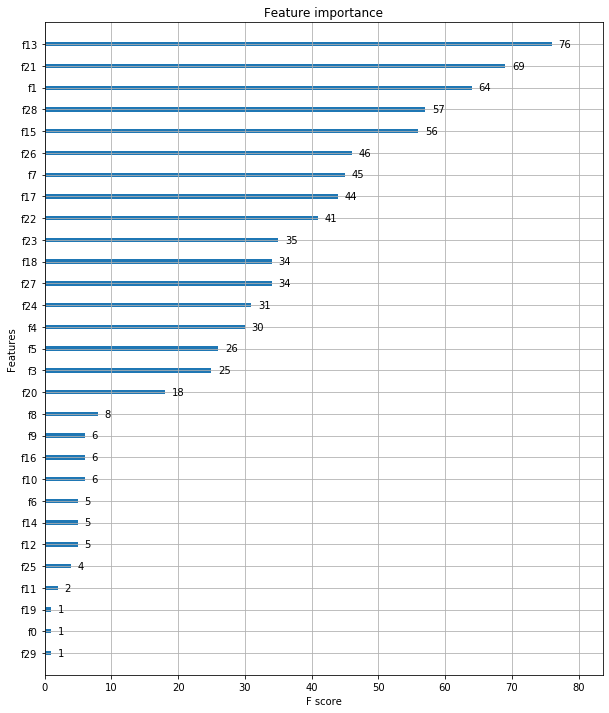

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb_model, ax=ax) # plot_importance ==> XGBoost에 내장된 시각화 기능(피처명은 알 수 없고, 순서로 알 수 있음)

#### 사이킷런 래퍼 XGBoost 개요 및 적용
- 사이킷런의 기본 Estimator를 그대로 상속해 만들었기 때문에 다른 Estimator와 동일하게 사용 가능
- 파이썬 래퍼와 사이킷런 래퍼의 차이
    - eta -> learning_rate
    - sub_sample -> subsample
    - lambda -> reg_lambda
    - alpha -> reg_alpha
    - 또한 n_estimators와 num_boost_round 하이퍼 파라미터는 서로 동일한 파라미터(두 개 동시 사용 시 각자의 파라미터명을 적용)

In [12]:
# 사이킷런 래퍼 XGBoost 클래스인 XGBClassifier 임포트(파이썬 래퍼와 동일하게 학습 및 예측 수행)
from xgboost import XGBClassifier

evals = [(X_test, y_test)]
xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
xgb_wrapper.fit(X_train , y_train,  early_stopping_rounds=400,eval_set=evals, eval_metric="logloss",  verbose=True)
w_preds = xgb_wrapper.predict(X_test)

[0]	validation_0-logloss:0.61352
Will train until validation_0-logloss hasn't improved in 400 rounds.
[1]	validation_0-logloss:0.547842
[2]	validation_0-logloss:0.494247
[3]	validation_0-logloss:0.447986
[4]	validation_0-logloss:0.409109
[5]	validation_0-logloss:0.374977
[6]	validation_0-logloss:0.345714
[7]	validation_0-logloss:0.320529
[8]	validation_0-logloss:0.29721
[9]	validation_0-logloss:0.277991
[10]	validation_0-logloss:0.260302
[11]	validation_0-logloss:0.246037
[12]	validation_0-logloss:0.231556
[13]	validation_0-logloss:0.22005
[14]	validation_0-logloss:0.208572
[15]	validation_0-logloss:0.199993
[16]	validation_0-logloss:0.190118
[17]	validation_0-logloss:0.181818
[18]	validation_0-logloss:0.174729
[19]	validation_0-logloss:0.167657
[20]	validation_0-logloss:0.158202
[21]	validation_0-logloss:0.154725
[22]	validation_0-logloss:0.148947
[23]	validation_0-logloss:0.143308
[24]	validation_0-logloss:0.136344
[25]	validation_0-logloss:0.132778
[26]	validation_0-logloss:0.127912

[230]	validation_0-logloss:0.086002
[231]	validation_0-logloss:0.085922
[232]	validation_0-logloss:0.086102
[233]	validation_0-logloss:0.086115
[234]	validation_0-logloss:0.086169
[235]	validation_0-logloss:0.086263
[236]	validation_0-logloss:0.086292
[237]	validation_0-logloss:0.086217
[238]	validation_0-logloss:0.086395
[239]	validation_0-logloss:0.086342
[240]	validation_0-logloss:0.08618
[241]	validation_0-logloss:0.086195
[242]	validation_0-logloss:0.086248
[243]	validation_0-logloss:0.086263
[244]	validation_0-logloss:0.086293
[245]	validation_0-logloss:0.086222
[246]	validation_0-logloss:0.086398
[247]	validation_0-logloss:0.086347
[248]	validation_0-logloss:0.086276
[249]	validation_0-logloss:0.086448
[250]	validation_0-logloss:0.086294
[251]	validation_0-logloss:0.086312
[252]	validation_0-logloss:0.086364
[253]	validation_0-logloss:0.086394
[254]	validation_0-logloss:0.08649
[255]	validation_0-logloss:0.086441
[256]	validation_0-logloss:0.08629
[257]	validation_0-logloss:0.08

In [13]:
get_clf_eval(y_test , w_preds) # 파이썬 래퍼와 동일한 결과를 출력함

오차 행렬
[[35  2]
 [ 1 76]]
정확도: 0.9737, 정밀도: 0.9744, 재현율: 0.9870,    F1: 0.9806, AUC:0.9665


In [14]:
# 사이킷런 래퍼도 조기 종료가 가능(early_stopping_rounds가 반복 횟수, eval_metric은 logloss, eval_set는 테스트 데이터 세트로 설정)
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
evals = [(X_test, y_test)]
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss", eval_set=evals, verbose=True)
ws100_preds = xgb_wrapper.predict(X_test) # 끝까지 수행하지 않고 종료함

[0]	validation_0-logloss:0.61352
Will train until validation_0-logloss hasn't improved in 100 rounds.
[1]	validation_0-logloss:0.547842
[2]	validation_0-logloss:0.494247
[3]	validation_0-logloss:0.447986
[4]	validation_0-logloss:0.409109
[5]	validation_0-logloss:0.374977
[6]	validation_0-logloss:0.345714
[7]	validation_0-logloss:0.320529
[8]	validation_0-logloss:0.29721
[9]	validation_0-logloss:0.277991
[10]	validation_0-logloss:0.260302
[11]	validation_0-logloss:0.246037
[12]	validation_0-logloss:0.231556
[13]	validation_0-logloss:0.22005
[14]	validation_0-logloss:0.208572
[15]	validation_0-logloss:0.199993
[16]	validation_0-logloss:0.190118
[17]	validation_0-logloss:0.181818
[18]	validation_0-logloss:0.174729
[19]	validation_0-logloss:0.167657
[20]	validation_0-logloss:0.158202
[21]	validation_0-logloss:0.154725
[22]	validation_0-logloss:0.148947
[23]	validation_0-logloss:0.143308
[24]	validation_0-logloss:0.136344
[25]	validation_0-logloss:0.132778
[26]	validation_0-logloss:0.127912

[230]	validation_0-logloss:0.086002
[231]	validation_0-logloss:0.085922
[232]	validation_0-logloss:0.086102
[233]	validation_0-logloss:0.086115
[234]	validation_0-logloss:0.086169
[235]	validation_0-logloss:0.086263
[236]	validation_0-logloss:0.086292
[237]	validation_0-logloss:0.086217
[238]	validation_0-logloss:0.086395
[239]	validation_0-logloss:0.086342
[240]	validation_0-logloss:0.08618
[241]	validation_0-logloss:0.086195
[242]	validation_0-logloss:0.086248
[243]	validation_0-logloss:0.086263
[244]	validation_0-logloss:0.086293
[245]	validation_0-logloss:0.086222
[246]	validation_0-logloss:0.086398
[247]	validation_0-logloss:0.086347
[248]	validation_0-logloss:0.086276
[249]	validation_0-logloss:0.086448
[250]	validation_0-logloss:0.086294
[251]	validation_0-logloss:0.086312
[252]	validation_0-logloss:0.086364
[253]	validation_0-logloss:0.086394
[254]	validation_0-logloss:0.08649
[255]	validation_0-logloss:0.086441
[256]	validation_0-logloss:0.08629
[257]	validation_0-logloss:0.08

In [15]:
get_clf_eval(y_test , ws100_preds) # 조기 종료가 너무 빠르면 성능이 급락할 수 있지만, 빠른 측정이 가능

오차 행렬
[[34  3]
 [ 1 76]]
정확도: 0.9649, 정밀도: 0.9620, 재현율: 0.9870,    F1: 0.9744, AUC:0.9530


In [16]:
# early_stopping_rounds를 10으로 설정하고 재 학습. 
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds=10, 
                eval_metric="logloss", eval_set=evals,verbose=True)

ws10_preds = xgb_wrapper.predict(X_test)
get_clf_eval(y_test , ws10_preds)

[0]	validation_0-logloss:0.61352
Will train until validation_0-logloss hasn't improved in 10 rounds.
[1]	validation_0-logloss:0.547842
[2]	validation_0-logloss:0.494247
[3]	validation_0-logloss:0.447986
[4]	validation_0-logloss:0.409109
[5]	validation_0-logloss:0.374977
[6]	validation_0-logloss:0.345714
[7]	validation_0-logloss:0.320529
[8]	validation_0-logloss:0.29721
[9]	validation_0-logloss:0.277991
[10]	validation_0-logloss:0.260302
[11]	validation_0-logloss:0.246037
[12]	validation_0-logloss:0.231556
[13]	validation_0-logloss:0.22005
[14]	validation_0-logloss:0.208572
[15]	validation_0-logloss:0.199993
[16]	validation_0-logloss:0.190118
[17]	validation_0-logloss:0.181818
[18]	validation_0-logloss:0.174729
[19]	validation_0-logloss:0.167657
[20]	validation_0-logloss:0.158202
[21]	validation_0-logloss:0.154725
[22]	validation_0-logloss:0.148947
[23]	validation_0-logloss:0.143308
[24]	validation_0-logloss:0.136344
[25]	validation_0-logloss:0.132778
[26]	validation_0-logloss:0.127912


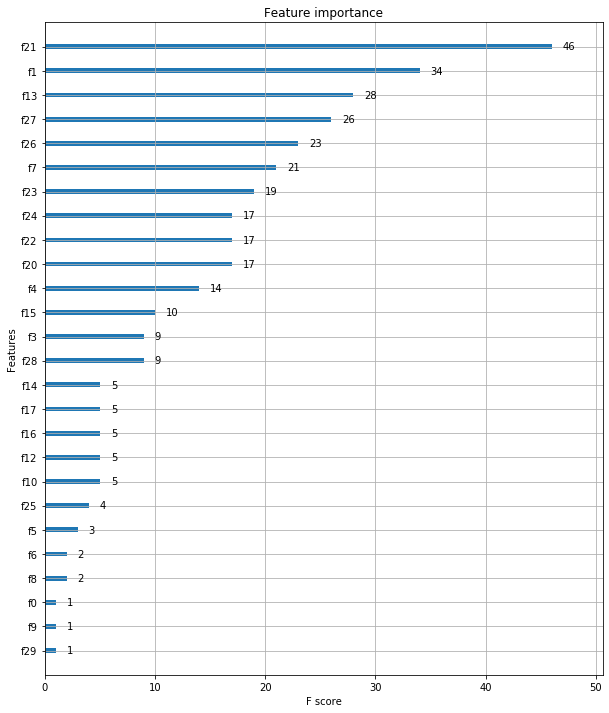

In [17]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
# 사이킷런 래퍼 클래스를 입력해도 무방. 
plot_importance(xgb_wrapper, ax=ax)

## 4.7 LightGBM
- XGBoost는 뛰어난 알고리즘이나 시간이 오래 걸려 하이퍼 파라미터 설정에 큰 어려움을 겪지만, LightGBM은 훨씬 빠른 속도를 가짐
- LightGBM과 XGBoost의 성능은 큰 차이가 없음(LightGBM이 나중에 개발되어 장점을 많이 가져옴)
- 단점은 적은 데이터 세트에서는 과적합의 문제를 발생함(공식 문서에서는 일반적으로 10,000건 이하의 데이터의 경우라 기술)
- LightGBM은 일반 GBM 계열의 트리 분할 방법과 다르게 리프 중심 트리 분할(Leaf Wise) 방식을 사용
- 기존 대부분의 트리 기반 알고리즘은 균형 트리 분할(Level Wise) 방식을 사용하여 과적합의 문제를 예방(균형을 맞추기 위해 시간은 더 걸림)
- LightGBM의 리프 중심 분할은 최대 손실 값(max delta loss)를 가지는 리프 노드를 계속 분할하여 비대칭적인 규칙 트리를 생성
- 최대 손실값을 가지는 리프 노드를 지속 분할하여 생성된 트리는 학습할수록 균형 트리보다 예측 오류 손실을 최소화 한다는 것이 구현 사상

- LightGBM 장점
    - 더 빠른 학습과 예측 수행 시간
    - 더 작은 메모리 사용량
    - 카테고리형 피처의 자동 변환과 최적 분할(원-핫 인코딩을 사용하지 않고도 카테고리형 피처를 최적으로 변환하고 이에 따른 노드 분할)
    
- LightGBM도 XGBoost와 동일하게 파이썬 래퍼와 사이킷런 래퍼가 존재

#### LightGBM 하이퍼 파라미터
- XGBoost와 다르게 리프 노드가 계속 분할되면서 트리가 깊어지므로 이러한 특성에 맞는 하이퍼 파라미터를 설정해야 함(깊이를 깊게 설정 등)
- 주요 파라미터
    - num_iterations: 반복을 수행하려는 트리의 개수를 지정(디폴트는 100 // 사이킷런 래퍼에서는 n_estimators)
    - learning_rate: 부스팅 스텝을 반복적으로 수행할 때 업데이트되는 학습률 값(디폴트 0.1)
    - max_depth: 트리 기반 알고리즘의 max_depth와 동일(LightGBM은 Leaf wise 기반으로 깊이가 상대적으로 더 깊음 // 디폴트 1)
    - min_data_in_leaf: 결정 트리의 min_samples_leaf와 동일(사이킷런 래퍼에서는 min_child_samples // 디폴트 20)
    - num_leaves: 하나의 트리가 가질 수 있는 최대 리프 개수(디폴트 31)
    - boosting: 부스팅의 트리를 생성하는 알고리즘을 기술
        - gbdt: 일반적인 그래디언트 부스팅 결정 트리
        - rf: 랜덤 포레스트
    - bagging_fraction: 과적합 제어를 위해 데이터 샘플링하는 비율을 설정(사이킷런 래퍼에서는 subsample)
    - feature_fraction: 개별 트리를 학슬할 때마다 무작위로 선택하는 피처의 비율(사이킷런에서는 closample_bytree)
    - lambda_l2: L2 규제 값으로 피처 개수가 많을수록 적용을 검토(클수록 과적합 감소 효과, 사이킷런 래퍼에서는 reg_lambda // 디폴트 0)
    - lambda_l1: L1 규제 값으로 L2와 마찮가지로 규제를 위함(사이킷런 래퍼에서는 reg_alpha // 디폴트 0)
- Learning Task 파라미터
    - objective: 최솟값을 가져야 할 손실함수를 정의(회귀, 다중, 이진 등에 따라 손실 함수가 결정)

#### 하이퍼 파라미터 튜닝 방안
    - num_leaves는 개별 트리가 가질 수 있는 최대 리프의 개수(높으면 정확도가 높아지지만, 트리가 깊어지고 과적합의 영향이 커짐)
    - min_data_in_leaf는 과적합 개선을 위한 중요한 파라미터(큰 값을 설정하면 트리가 깊어지는 것을 방지)
    - max_depth는 트리의 깊이를 제한
- learning_rate를 작게 하면서 n_estimators를 크게 하는 것은 부스팅 계열에서 가장 기본적인 튜닝 방안
- 이외에 과적합 예방을 위해 L1, L2 규제 및 샘플링 레코드 개수를 줄이기 위해 colsample_bytree, subsample 파라미터 사용 가능

#### LightGBM 적용 - 위스콘신 유방암 예측

In [18]:
import lightgbm

print(lightgbm.__version__)

2.3.1


In [19]:
# LightGBM의 파이썬 패키지인 lightgbm에서 LGBMClassifier 임포트
from lightgbm import LGBMClassifier

import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

dataset = load_breast_cancer()
ftr = dataset.data
target = dataset.target

# 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
X_train, X_test, y_train, y_test=train_test_split(ftr, target, test_size=0.2, random_state=156 )

# 앞서 XGBoost와 동일하게 n_estimators는 400 설정. 
lgbm_wrapper = LGBMClassifier(n_estimators=400)

# LightGBM도 XGBoost와 동일하게 조기 중단 수행 가능. 
evals = [(X_test, y_test)]
lgbm_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss", eval_set=evals, verbose=True)
preds = lgbm_wrapper.predict(X_test) # 조기 중단으로 일찍 종료

[1]	valid_0's binary_logloss: 0.565079
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.507451
[3]	valid_0's binary_logloss: 0.458489
[4]	valid_0's binary_logloss: 0.417481
[5]	valid_0's binary_logloss: 0.385507
[6]	valid_0's binary_logloss: 0.355846
[7]	valid_0's binary_logloss: 0.330897
[8]	valid_0's binary_logloss: 0.306923
[9]	valid_0's binary_logloss: 0.28776
[10]	valid_0's binary_logloss: 0.26917
[11]	valid_0's binary_logloss: 0.250954
[12]	valid_0's binary_logloss: 0.23847
[13]	valid_0's binary_logloss: 0.225865
[14]	valid_0's binary_logloss: 0.215076
[15]	valid_0's binary_logloss: 0.205996
[16]	valid_0's binary_logloss: 0.196091
[17]	valid_0's binary_logloss: 0.186395
[18]	valid_0's binary_logloss: 0.17942
[19]	valid_0's binary_logloss: 0.174727
[20]	valid_0's binary_logloss: 0.168563
[21]	valid_0's binary_logloss: 0.165432
[22]	valid_0's binary_logloss: 0.160356
[23]	valid_0's binary_logloss: 0.155508
[24]	valid_0's binary_logloss: 

In [20]:
get_clf_eval(y_test, preds) # XGBoost 보다는 작지만, 데이터 세트가 작아 알고리즘 간 성능 비교는 큰 의미가 없음

오차 행렬
[[33  4]
 [ 2 75]]
정확도: 0.9474, 정밀도: 0.9494, 재현율: 0.9740,    F1: 0.9615, AUC:0.9330


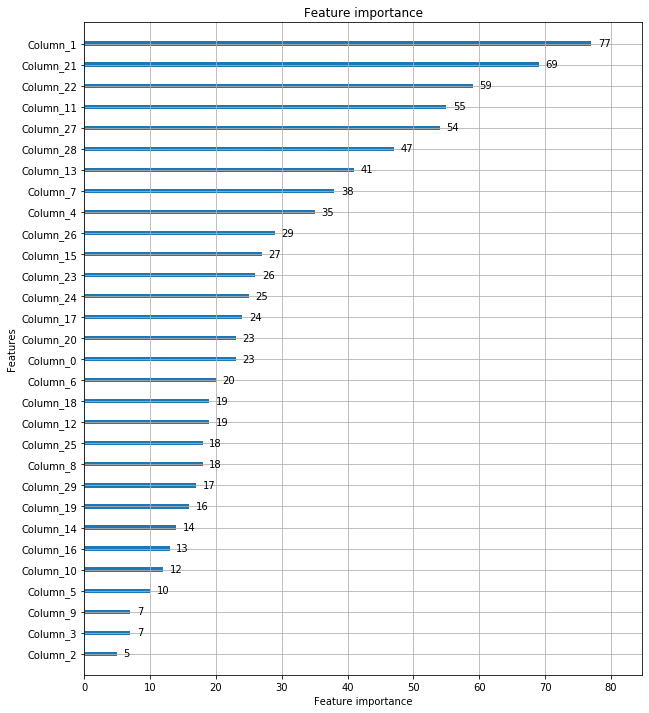

In [21]:
# plot_importance( )를 이용하여 feature 중요도 시각화
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(lgbm_wrapper, ax=ax)